In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from matplotlib import pylab as plt

In [2]:
df = pd.read_csv('data/parkinsonsdata.csv')

In [38]:
y = df['Age_of_disease_onset']
X = df.loc[:, df.columns != 'Age_of_disease_onset']
print(y.head(5))
print(X.head(5))

0    56
1    67
2    67
3    73
4    60
Name: Age_of_disease_onset, dtype: object
  Participant_code   Age Gender history  Duration_of_disease Antidepressant  \
0             PD01  58.0      F      No                    2             No   
1             PD02  68.0      F      No                    1             No   
2             PD03  68.0      M      No                    1             No   
3             PD04  75.0      M      No                    2             No   
4             PD05  61.0      M     Yes                  0.7             No   

  Antiparkinsonian_medication  Antipsychotic_medication  \
0                           No                       No   
1                           No                       No   
2                           No                       No   
3                           No                       No   
4                           No                       No   

  Benzodiazepine_medication  Levodopa_equivalent  ...  \
0                        No    

In [ ]:
df_labels = 

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
print(df.dtypes)

Participant_code                         object
Age                                     float64
Gender                                   object
history                                  object
Age_of_disease_onset                     object
 Duration_of_disease                     object
Antidepressant                           object
Antiparkinsonian_medication              object
Antipsychotic_medication                 object
Benzodiazepine_medication                object
Levodopa_equivalent                     float64
Clonazepam                              float64
motor_examination_HY                     object
motor_examination_UPDRS_III              object
Speech                                   object
Facial_Expression                        object
Tremor_at_Rest_head                      object
Tremor_at_Rest_RUE                       object
Tremor_at_Rest_LUE                       object
Tremor_at_Rest_RLE                       object
Tremor_at_Rest_LLE                      

In [4]:
df.shape

(171, 69)

In [36]:
columns_to_drop_indices = [65, 66, 67, 68] # Dropping the last four columns that are empty
df.drop(df.columns[columns_to_drop_indices], axis=1, inplace=True)

IndexError: index 65 is out of bounds for axis 0 with size 65

In [6]:
df.shape

(171, 65)

In [8]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
print(df.dtypes) # Checking to make sure 'Latency_of_respiratory_exchange_m' is the last column

Participant_code                         object
Age                                     float64
Gender                                   object
history                                  object
Age_of_disease_onset                     object
 Duration_of_disease                     object
Antidepressant                           object
Antiparkinsonian_medication              object
Antipsychotic_medication                 object
Benzodiazepine_medication                object
Levodopa_equivalent                     float64
Clonazepam                              float64
motor_examination_HY                     object
motor_examination_UPDRS_III              object
Speech                                   object
Facial_Expression                        object
Tremor_at_Rest_head                      object
Tremor_at_Rest_RUE                       object
Tremor_at_Rest_LUE                       object
Tremor_at_Rest_RLE                       object
Tremor_at_Rest_LLE                      

In [39]:
print(X.shape)
print(y.shape)

(171, 64)
(171,)


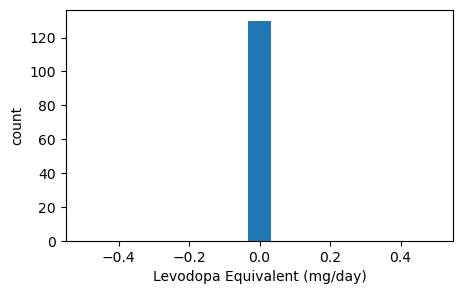

In [8]:
plt.figure(figsize=(5,3))

X['Levodopa_equivalent'].plot.hist(bins = 15)
                      
plt.xlabel('Levodopa Equivalent (mg/day)')
plt.ylabel('count')
plt.show()

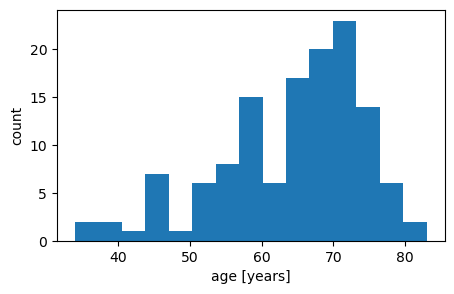

In [9]:
plt.figure(figsize=(5,3))

X['Age'].plot.hist(bins = 15)
                      
plt.xlabel('age [years]')
plt.ylabel('count')
plt.show()

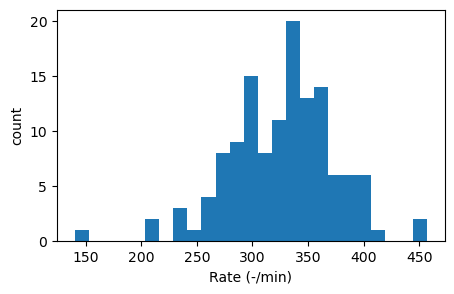

In [10]:
plt.figure(figsize=(5,3))

X['Rate_of_speech_timing_p'].plot.hist(bins = 25)
                      
plt.xlabel('Rate (-/min)')
plt.ylabel('count')
plt.show()

In [11]:
nbins = 25
range1 = [[0, 100], [0, 500]]

heatmap, xedges, yedges = np.histogram2d(X['Age'], X['Rate_of_speech_timing_p'], bins=nbins, range=range1)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

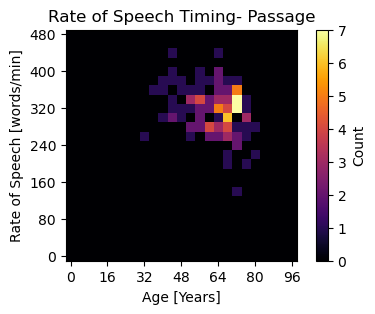

In [12]:
heatmap[heatmap == 0] = 0 
plt.figure(figsize=(5,3))

plt.imshow(heatmap.T, origin='lower',vmin=0, cmap='inferno') 
plt.xlabel('Age [Years]')
plt.ylabel('Rate of Speech [words/min]')
plt.xticks(np.arange(nbins+1)[::4],xedges[::4].astype(int))
plt.yticks(np.arange(nbins+1)[::4],yedges[::4].astype(int))
plt.colorbar(label='Count')
plt.title('Rate of Speech Timing- Passage')
plt.show()

In [13]:
nbins = 25
range2 = [[0, 500], [0, 500]]

heatmap, xedges, yedges = np.histogram2d(X['Rate_of_speech_timing_m'], X['Rate_of_speech_timing_p'], bins=nbins, range=range2)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

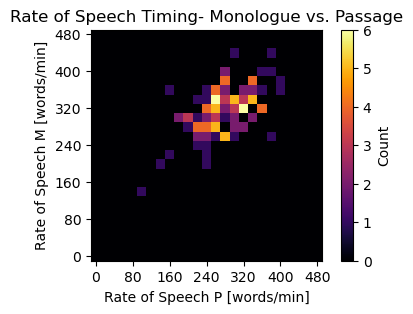

In [14]:
heatmap[heatmap == 0] = 0 
plt.figure(figsize=(5,3))

plt.imshow(heatmap.T, origin='lower',vmin=0, cmap='inferno') 
plt.xlabel('Rate of Speech P [words/min]')
plt.ylabel('Rate of Speech M [words/min]')
plt.xticks(np.arange(nbins+1)[::4],xedges[::4].astype(int))
plt.yticks(np.arange(nbins+1)[::4],yedges[::4].astype(int))
plt.colorbar(label='Count')
plt.title('Rate of Speech Timing- Monologue vs. Passage')
plt.show()

In [15]:
nbins = 25
range1 = [[0, 100], [0, 500]]

heatmap, xedges, yedges = np.histogram2d(X['Age'], X['Rate_of_speech_timing_m'], bins=nbins, range=range1)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

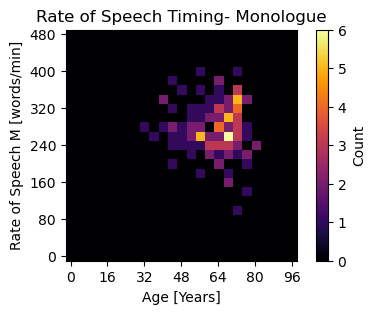

In [16]:
heatmap[heatmap == 0] = 0 
plt.figure(figsize=(5,3))

plt.imshow(heatmap.T, origin='lower',vmin=0, cmap='inferno') 
plt.xlabel('Age [Years]')
plt.ylabel('Rate of Speech M [words/min]')
plt.xticks(np.arange(nbins+1)[::4],xedges[::4].astype(int))
plt.yticks(np.arange(nbins+1)[::4],yedges[::4].astype(int))
plt.colorbar(label='Count')
plt.title('Rate of Speech Timing- Monologue')
plt.show()

In [18]:
df.replace('-', np.NaN, inplace=True) #Null values have '-' in the dataset, 
# this is mostly for the third class of patients that were considered 'Healthy'

In [18]:
count_matrix = df.groupby(['Gender', ' Duration_of_disease']).size().unstack()
print(count_matrix)

count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm)

 Duration_of_disease     -  0.5  0.7     1   10   11   12   15   16   17    2  \
Gender                                                                          
F                      9.0  NaN  NaN   5.0  NaN  NaN  NaN  NaN  NaN  NaN  5.0   
M                     41.0  1.0  1.0  19.0  3.0  3.0  1.0  1.0  2.0  1.0  7.0   

 Duration_of_disease  2.3  2.5    3    4    5    6    7    8    9  
Gender                                                             
F                     NaN  1.0  1.0  1.0  3.0  NaN  1.0  1.0  NaN  
M                     1.0  NaN  7.0  3.0  6.0  2.0  1.0  2.0  1.0  
 Duration_of_disease         -       0.5       0.7         1        10  \
Gender                                                                   
F                     0.333333       NaN       NaN  0.185185       NaN   
M                     0.398058  0.009709  0.009709  0.184466  0.029126   

 Duration_of_disease        11        12        15        16        17  \
Gender                          

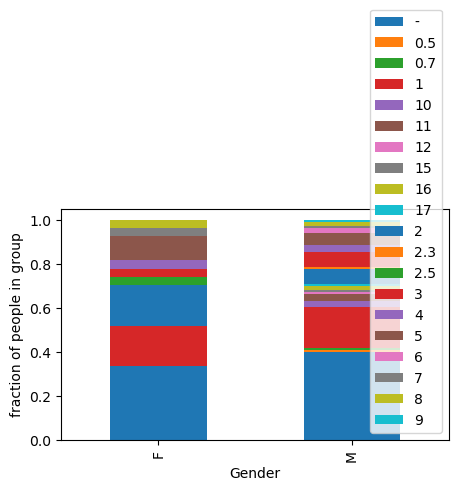

In [19]:
count_matrix_norm.plot(kind='bar', stacked=True,figsize=(5,3))
plt.ylabel('fraction of people in group')
plt.legend(loc=4)
plt.show()

In [20]:
count_matrix = df.groupby(['Gender', 'Antidepressant']).size().unstack()
print(count_matrix)

count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm)

Antidepressant    No  Yes (Anafranil)  Yes (Asentra)  Yes (Aurorix)  \
Gender                                                                
F               24.0              NaN            NaN            1.0   
M               96.0              1.0            1.0            NaN   

Antidepressant  Yes (Cipralex)  Yes (Citalec)  Yes (Remood)  Yes (Trittico)  \
Gender                                                                        
F                          1.0            NaN           NaN             NaN   
M                          NaN            1.0           1.0             1.0   

Antidepressant  Yes (Velaxin)  Yes (Zoloft)  
Gender                                       
F                         1.0           NaN  
M                         NaN           2.0  
Antidepressant        No  Yes (Anafranil)  Yes (Asentra)  Yes (Aurorix)  \
Gender                                                                    
F               0.888889              NaN            NaN       0

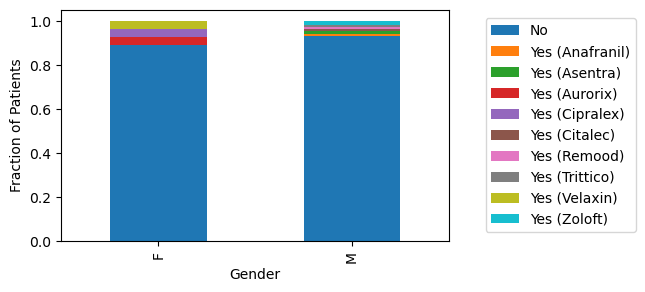

In [21]:
count_matrix_norm.plot(kind='bar', stacked=True,figsize=(5,3))
plt.ylabel('Fraction of Patients')
plt.legend(loc='right',bbox_to_anchor=(1.5, 0.5))
plt.show()

In [22]:
import seaborn as sns

<Axes: xlabel=' Duration_of_disease', ylabel='Age'>

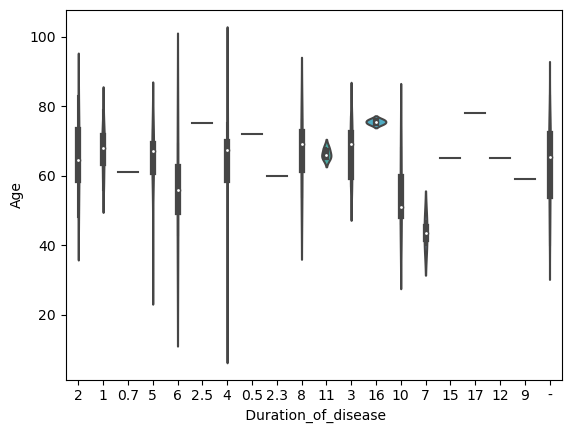

In [23]:
sns.violinplot(x=df[' Duration_of_disease'], y=df['Age'], data=X)

In [40]:
median_value = df[' Duration_of_disease'].median()

# Print the median value
print(f"Median of 'Duration of Disease': {median_value}")

TypeError: could not convert string to float: '-'

In [26]:
df['Duration_category'] = df[' Duration_of_disease'].astype(float).apply(lambda x: '<=10' if x <= 10 else '>10')

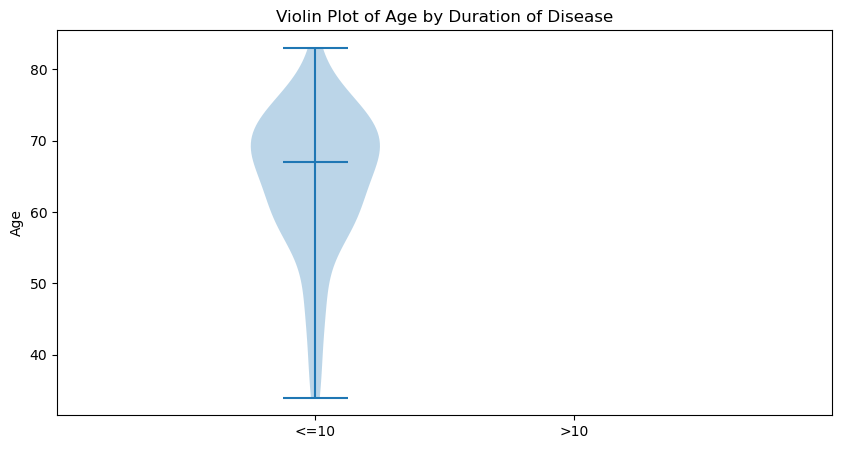

In [27]:
under_10 = df[df['Duration_category'] == '<=10']['Age'].values
over_10 = df[df['Duration_category'] == '>10']['Age'].values
none = df[df['Duration_category'] == 'NaN']['Age'].values

plt.figure(figsize=(10, 5))
plt.violinplot(dataset=[under_10], showmedians=True, positions=[1])
plt.xticks([1, 2], ['<=10', '>10'])
plt.ylabel('Age')
plt.title('Violin Plot of Age by Duration of Disease')
plt.xlim(0, 3)
plt.show()

/Users/kategilbert/anaconda3/envs/data1030/lib/python3.11/site-packages/matplotlib/axes/_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


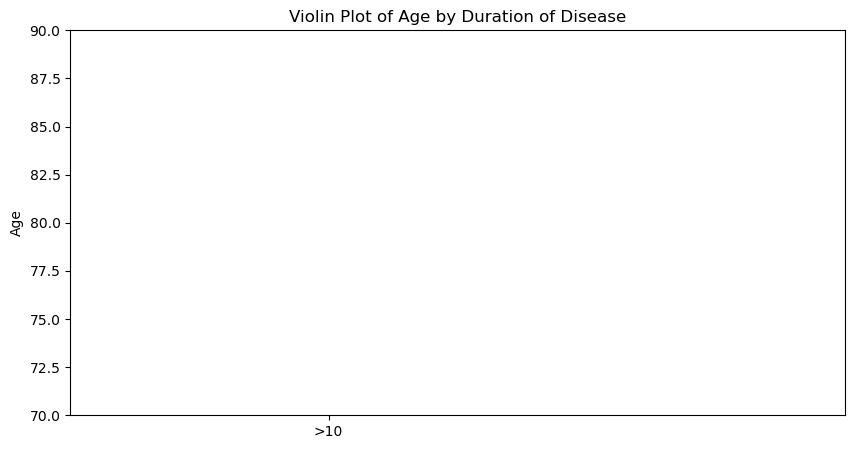

In [28]:
under_10 = df[df['Duration_category'] == '<=10']['Age'].values
over_10 = df[df['Duration_category'] == '>10']['Age'].values
none = df[df['Duration_category'] == 'NaN']['Age'].values

plt.figure(figsize=(10, 5))
plt.violinplot(dataset=[over_10], showmedians=True, positions=[1])
plt.xticks([1], ['>10'])
plt.ylabel('Age')
plt.title('Violin Plot of Age by Duration of Disease')
plt.xlim(0, 3)
plt.ylim(70, 90)
plt.show()

In [29]:
category_counts = df['Duration_category'].value_counts()
print(category_counts)

Duration_category
>10     99
<=10    72
Name: count, dtype: int64


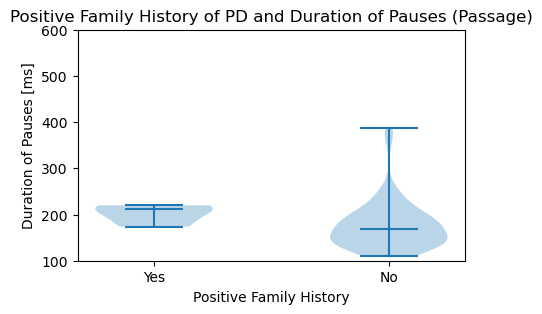

In [32]:
dataset = [df[df['history']=='Yes']['Duration_ of_pause_intervals_p'].values,
           df[df['history']=='No']['Duration_ of_pause_intervals_p'].values]

plt.figure(figsize=(5,3))

plt.violinplot(dataset = dataset,showmedians=True)
plt.xticks([1,2],['Yes','No'])
plt.ylim(100, 600) # Changing y-axis range to match the graph below (comment from midterm presentation)
plt.ylabel('Duration of Pauses [ms]')
plt.xlabel('Positive Family History')
plt.title('Positive Family History of PD and Duration of Pauses (Passage)')
plt.show()

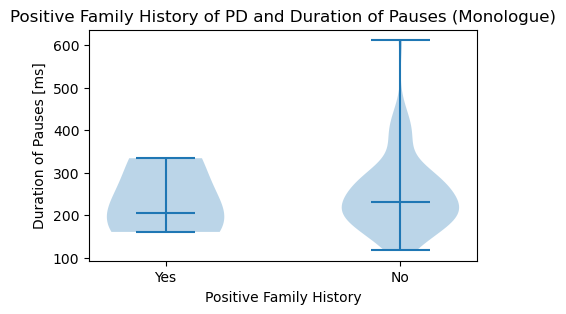

In [31]:
dataset = [df[df['history']=='Yes']['Duration_of_pause_intervals_m'].values,
           df[df['history']=='No']['Duration_of_pause_intervals_m'].values]

plt.figure(figsize=(5,3))

plt.violinplot(dataset = dataset,showmedians=True)
plt.xticks([1,2],['Yes','No'])
plt.ylabel('Duration of Pauses [ms]')
plt.xlabel('Positive Family History')
plt.title('Positive Family History of PD and Duration of Pauses (Monologue)')
plt.show()

In [33]:
df['FirstTwo'] = df['Participant_code'].str[:2]

In [34]:
grouped = df.groupby(df['Participant_code'].str[:2])

for group_name, group_data in grouped:
    print(f"Group: {group_name}")
    print(group_data.shape)

Group: HC
(50, 67)
Group: PD
(30, 67)
Group: RB
(50, 67)


In [41]:
from sklearn.model_selection import train_test_split 

In [42]:
df.fillna(0, inplace=True)

In [ ]:
y = df['Age_of_disease_onset']
X = df.drop(['Age_of_disease_onset', 'Duration_category', 'FirstTwo'], axis=1)

In [47]:
X = X.drop(index=range(130, 171))
y = y.drop(index=range(130, 171))

In [50]:
y.replace(0, 117, inplace=True)
y.replace('-', 117, inplace=True)

In [51]:
y

0       56
1       67
2       67
3       73
4       60
      ... 
125    117
126    117
127    117
128    117
129    117
Name: Age_of_disease_onset, Length: 130, dtype: object

In [88]:
columns_to_replace = ['history']
X[columns_to_replace] = X[columns_to_replace].replace(0, 'No')

In [53]:
X.dtypes

Participant_code                       object
Age                                   float64
Gender                                 object
history                                object
 Duration_of_disease                   object
                                       ...   
Decay_of_unvoiced_fricatives_m        float64
Relative_loudness_of_respiration_m    float64
Pause_intervals_per_respiration_m     float64
Rate_of_speech_respiration_m          float64
Latency_of_respiratory_exchange_m     float64
Length: 64, dtype: object

In [102]:
columns_to_replace = ['history']
X_train[columns_to_replace] = X_train[columns_to_replace].replace('0', 'No')
X_test[columns_to_replace] = X_test[columns_to_replace].replace(0, 'No')
X_val[columns_to_replace] = X_val[columns_to_replace].replace(0, 'No')

In [103]:
X_val

,Age,Gender,history,Duration_of_disease,Antidepressant,Antiparkinsonian_medication,Antipsychotic_medication,Benzodiazepine_medication,Levodopa_equivalent,Clonazepam,...,Acceleration_of_speech_timing_m,Duration_of_pause_intervals_m,Duration_of_voiced_intervals_m,Gaping_in_between_voiced_intervals_m,Duration_of_unvoiced_stops_m,Decay_of_unvoiced_fricatives_m,Relative_loudness_of_respiration_m,Pause_intervals_per_respiration_m,Rate_of_speech_respiration_m,Latency_of_respiratory_exchange_m
45,61.0,M,No,5,No,No,No,No,0.0,0.0,...,-17.87,169.0,392.0,30.97,35.88,1.916,-16.26,4.0,18.19,165.0
27,60.0,M,No,1,No,No,No,No,0.0,0.0,...,-7.02,243.0,308.0,51.58,20.13,0.254,-17.70,6.0,17.47,262.0
55,66.0,M,No,1,No,No,No,No,0.0,0.0,...,5.36,293.0,345.0,39.23,31.38,-0.918,-20.42,3.0,23.22,98.0
9,66.0,M,No,1,Yes (Trittico),No,No,No,0.0,0.0,...,4.99,246.0,356.0,38.19,40.37,0.500,-20.20,3.5,15.50,69.0
78,59.0,M,No,9,No,No,No,No,0.0,0.0,...,4.61,178.0,317.0,58.27,29.13,-0.347,-19.73,5.0,16.04,90.0
42,67.0,F,No,4,No,No,No,No,0.0,0.0,...,6.53,280.0,279.0,39.52,31.37,0.815,-18.00,2.0,16.87,127.0
22,73.0,F,No,2,No,No,No,No,0.0,0.0,...,7.36,202.0,332.0,47.43,20.13,0.208,-17.80,4.0,14.93,105.0
0,58.0,F,No,2,No,No,No,No,0.0,0.0,...,-2.82,158.0,318.0,49.01,22.37,0.588,-19.77,6.0,13.81,127.0
124,46.0,M,No,0,No,No,No,No,0.0,0.0,...,-1.67,132.0,241.0,56.71,22.37,-0.201,-8.86,6.0,15.75,117.0
40,73.0,M,No,3,No,No,No,No,0.0,0.0,...,0.23,183.0,322.0,53.33,22.38,-0.199,-20.96,5.5,15.72,161.0


In [55]:
y

0       56
1       67
2       67
3       73
4       60
      ... 
125    117
126    117
127    117
128    117
129    117
Name: Age_of_disease_onset, Length: 130, dtype: object

In [68]:
random_state = 42
#y = y.astype(str)

X_train, X_other, y_train, y_other = train_test_split(X,y,train_size = 0.6,random_state = random_state)
print('training set:',X_train.shape, y_train.shape)
print(X_other.shape, y_other.shape)

X_val, X_test, y_val, y_test = train_test_split(X_other,y_other,train_size = 0.5,random_state = random_state)
print('validation set:',X_val.shape, y_val.shape) # 20% of points are in validation
print('test set:',X_test.shape, y_test.shape) # 20% of points are in test

training set: (78, 64) (78,)
(52, 64) (52,)
validation set: (26, 64) (26,)
test set: (26, 64) (26,)


In [69]:
grouped = df.groupby(X_train['Participant_code'].str[:2])
for group_name, group_data in grouped:
    print(f"Group: {group_name}")
    print(group_data.shape)

Group: HC
(34, 65)
Group: PD
(15, 65)
Group: RB
(29, 65)


In [70]:
grouped = df.groupby(X_test['Participant_code'].str[:2])
for group_name, group_data in grouped:
    print(f"Group: {group_name}")
    print(group_data.shape)

Group: HC
(8, 65)
Group: PD
(6, 65)
Group: RB
(12, 65)


In [71]:
grouped = df.groupby(X_val['Participant_code'].str[:2])
for group_name, group_data in grouped:
    print(f"Group: {group_name}")
    print(group_data.shape)

Group: HC
(8, 65)
Group: PD
(9, 65)
Group: RB
(9, 65)


In [72]:
print('data dimensions:',df.shape)
perc_missing_per_ftr = df.isnull().sum(axis=0)/df.shape[0]
print('fraction of missing values in features:')
print(perc_missing_per_ftr[perc_missing_per_ftr > 0])
print('data types of the features with missing values:')
print(df[perc_missing_per_ftr[perc_missing_per_ftr > 0].index].dtypes)
frac_missing = sum(df.isnull().sum(axis=1)!=0)/df.shape[0]
print('fraction of points with missing values:',frac_missing)

#I fixed missing values by treating them as a separate class, or using 0 in place of a measurement for a healthy individual. 
#I also used 117 as the age of disease onset for healthy individuals, the age of the oldest living person on earth. This means that this person
#is very likely to NOT develop Parkinson's in their lifetime. 

data dimensions: (171, 65)
fraction of missing values in features:
Series([], dtype: float64)
data types of the features with missing values:
Series([], dtype: object)
fraction of points with missing values: 0.0


In [73]:
column_to_drop = 'Participant_code'

# Dropping participant code now that I have seen the distribution of the types of patients in each set.
X_train = X_train.drop(column_to_drop, axis=1)
X_test = X_test.drop(column_to_drop, axis=1)
X_val = X_val.drop(column_to_drop, axis=1)

In [74]:
X_train.dtypes

Age                                   float64
Gender                                 object
history                                object
 Duration_of_disease                   object
Antidepressant                         object
                                       ...   
Decay_of_unvoiced_fricatives_m        float64
Relative_loudness_of_respiration_m    float64
Pause_intervals_per_respiration_m     float64
Rate_of_speech_respiration_m          float64
Latency_of_respiratory_exchange_m     float64
Length: 63, dtype: object

In [75]:
#Collecting features
cat_ftrs = ['Gender','history','Antidepressant','Antiparkinsonian_medication ','Antipsychotic_medication','Benzodiazepine_medication']
ord_ftrs = ['Speech','Facial_Expression','Tremor_at_Rest_head','Tremor_at_Rest_RUE','Tremor_at_Rest_LUE','Tremor_at_Rest_RLE',\
            'Tremor_at_Rest_LLE','Action_or_Postural_Tremor_RUE','Action_or_Postural_Tremor_LUE','Rigidity_neck','Rigidity_RUE','Rigidity_LUE','Rigidity_RLE',\
           'Rigidity_LLE','Finger_Taps_RUE','Finger_Taps_LUE','Hand_Movements_RUE','Hand_Movements_LUE','Rapid_Alternating_Movements_RUE',\
            'Rapid_Alternating_Movements_LUE','Leg_Agility_RLE','Leg_Agility_LLE','Arising_from_Chair','Posture','Gait','Postural_Stability',\
           'Body_Bradykinesia_Hypokinesia']
ord_cats = [['0','1','2','3','4'],['0','1','2','3','4'],['0','1','2','3','4'],['0','1','2','3','4'],['0','1','2','3','4'],['0','1','2','3','4'],\
            ['0','1','2','3','4'],['0','1','2','3','4'],['0','1','2','3','4'],['0','1','2','3','4'],['0','1','2','3','4'],['0','1','2','3','4'],['0','1','2','3','4'],\
            ['0','1','2','3','4'],['0','1','2','3','4'],['0','1','2','3','4'],['0','1','2','3','4'],['0','1','2','3','4'],['0','1','2','3','4'],\
            ['0','1','2','3','4'],['0','1','2','3','4'],['0','1','2','3','4'],['0','1','2','3','4'],['0','1','2','3','4'],['0','1','2','3','4'],['0','1','2','3','4'],\
            ['0','1','2','3','4']]
num_ftrs = ['Age',' Duration_of_disease','Levodopa_equivalent','Clonazepam','motor_examination_HY','motor_examination_UPDRS_III',\
            'Entropy_of_speech_timing_p','Rate_of_speech_timing_p','Acceleration_of_speech_timing_p','Duration_ of_pause_intervals_p',\
            'Duration_of_voiced_intervals_p','Gaping_in_between_voiced_intervals_p','Duration_of_unvoiced_stops_p','Decay_of_unvoiced_fricatives_p',\
            'Relative_loudness_of_respiration_p','Pause_intervals_per_respiration_p','Rate_of_speech_respiration_p','Latency_of_respiratory_exchange_p',\
            'Entropy_of_speech_timing_m','Rate_of_speech_timing_m','Acceleration_of_speech_timing_m','Duration_of_pause_intervals_m',\
            'Duration_of_voiced_intervals_m','Gaping_in_between_voiced_intervals_m','Duration_of_unvoiced_stops_m','Decay_of_unvoiced_fricatives_m',\
            'Relative_loudness_of_respiration_m','Pause_intervals_per_respiration_m','Rate_of_speech_respiration_m','Latency_of_respiratory_exchange_m']

In [76]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler

# one-hot encoder
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse_output=False,handle_unknown='ignore'))])

# ordinal encoder
ordinal_transformer = Pipeline(steps=[
    ('ordinal', OrdinalEncoder(categories = ord_cats))])

# standard scaler
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# collect the transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_ftrs),
        ('cat', categorical_transformer, cat_ftrs),
        ('ord', ordinal_transformer, ord_ftrs)])

In [108]:
# fit_transform the training set
X_prep = preprocessor.fit_transform(X_train)
feature_names = preprocessor.get_feature_names_out()

df_train = pd.DataFrame(data=X_prep,columns=feature_names)
print(f'preprocessed train size: {df_train.shape}')

# transform the val
X_val_prep = preprocessor.transform(X_val)
df_val = pd.DataFrame(data=X_val_prep,columns = feature_names)
print(f'preprocessed validation size: {df_val.shape}')

# transform the test
X_test_prep = preprocessor.transform(X_test)
df_test = pd.DataFrame(data=X_test_prep,columns = feature_names)
print(f'preprocessed test size: {df_test.shape}')

preprocessed train size: (78, 75)
preprocessed validation size: (26, 75)
preprocessed test size: (26, 75)


In [109]:
print("Training set categories:", X_train['Speech'].unique())
print("Test set categories:", X_test['Speech'].unique())
print("Training set categories:", X_val['Speech'].unique())
#Seeing that I originally had both integer 0 and string '0' as categories

Training set categories: ['0' '1']
Test set categories: ['0' '1']
Training set categories: ['0' '1']


In [106]:
columns_to_convert = ['Speech','Facial_Expression', 'Tremor_at_Rest_head', 'Tremor_at_Rest_RUE', 'Tremor_at_Rest_LUE', 'Tremor_at_Rest_RLE',
                       'Tremor_at_Rest_LLE', 'Action_or_Postural_Tremor_RUE', 'Action_or_Postural_Tremor_LUE', 'Rigidity_neck', 'Rigidity_RUE',
                       'Rigidity_LUE', 'Rigidity_RLE', 'Rigidity_LLE', 'Finger_Taps_RUE', 'Finger_Taps_LUE', 'Hand_Movements_RUE',
                       'Hand_Movements_LUE', 'Rapid_Alternating_Movements_RUE', 'Rapid_Alternating_Movements_LUE', 'Leg_Agility_RLE',
                       'Leg_Agility_LLE', 'Arising_from_Chair', 'Posture', 'Gait', 'Postural_Stability', 'Body_Bradykinesia_Hypokinesia']

X_train[columns_to_convert] = X_train[columns_to_convert].astype(str)
#Had to change my replacement for missing values from an integer 0 to a string '0'

In [107]:
X_test[columns_to_convert] = X_test[columns_to_convert].astype(str)
X_val[columns_to_convert] = X_val[columns_to_convert].astype(str)

In [111]:
#Linear Regression to start
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()

# Fit the model to the entire training set
model.fit(X_prep, y_train)

# Validate the model on the validation set
y_val_pred = model.predict(X_val_prep)

# Calculate and print the Mean Squared Error (MSE) on the validation set
mse = mean_squared_error(y_val, y_val_pred)
print(f'Mean Squared Error on Validation Set: {mse}')

Q1 = np.percentile(y_val_pred, 25)
Q3 = np.percentile(y_val_pred, 75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
filtered_y_val_pred = [0 if lower_bound <= x <= upper_bound else x for x in y_val_pred]

num_samples = len(filtered_y_val_pred)
patient_labels = ['{}'.format(i+1) for i in range(num_samples)]

# Plot the patient IDs vs. true values and add a trendline for predicted values
#plt.figure(figsize=(15, 8))
#plt.scatter(patient_labels, y_val, label='True Values', color='blue')
#plt.scatter(patient_labels, filtered_y_val_pred, label='Predicted Values', color='red')
#plt.xticks(patient_labels)
#plt.xlabel('Patient ID')
#plt.ylabel('Age of Disease Onset')
#plt.title('True vs. Predicted Values - Validation Set')
#plt.ylim(0,100,5)
#plt.yticks(np.arange(-100, 101, 5))
#plt.legend()
#plt.show()
#This plot looks wrong, will re-do below

Mean Squared Error on Validation Set: 1.391694799842679e+24


In [131]:
sorted_data = sorted(zip(patient_labels, y_val), key=lambda x: x[1])
sorted_pred = sorted(zip(patient_labels, y_val_pred), key=lambda x: x[1])

# Unzip the sorted data
sorted_patient_labels, sorted_y_val = zip(*sorted_data)
sorted_patient_labels_pred, sorted_y_val_pred = zip(*sorted_pred)

# Rearrange patient_labels of y_val_pred to match the order of sorted_patient_labels
rearranged_y_val_pred = [y_val_pred[patient_labels.index(label)] for label in sorted_patient_labels]

# Print the results
print("Sorted patient_labels:", sorted_patient_labels)
print("Sorted y_val:", sorted_y_val)
print("Sorted patient_labels_pred:", sorted_patient_labels_pred)
print("Rearranged y_val_pred:", rearranged_y_val_pred)

Sorted patient_labels: (21, 15, 5, 1, 8, 25, 16, 20, 2, 6, 13, 3, 4, 12, 26, 10, 11, 7, 9, 14, 17, 18, 19, 22, 23, 24)
Sorted y_val: (30, 32, 50, 56, 56, 56, 58, 58, 59, 63, 64, 65, 65, 69, 69, 70, 70, 71, 117, 117, 117, 117, 117, 117, 117, 117)
Sorted patient_labels_pred: (21, 10, 20, 13, 7, 16, 6, 3, 8, 25, 5, 12, 1, 24, 22, 9, 17, 23, 14, 18, 26, 19, 2, 11, 15, 4)
Rearranged y_val_pred: [-151.65625, 231.21875, 51.34375, 94.21875, 37.34375, 49.03125, -4.3125, -113.15625, 139.96875, 32.53125, -84.59375, 35.59375, 6015319176626.594, 93.21875, 119.03125, -134.03125, 200.59375, -36.5, 100.59375, 116.28125, 108.53125, 117.9375, 126.0625, 99.375, 115.90625, 98.09375]


In [126]:
patient_labels_data_types = [type(element) for element in patient_labels]
print("Data types of elements in patient_labels:", patient_labels_data_types)

# Check data types of elements in y_val
y_val_data_types = [type(element) for element in y_val]
print("Data types of elements in y_val:", y_val_data_types)


Data types of elements in patient_labels: [<class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>]
Data types of elements in y_val: [<class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>]


In [125]:
# Need to make sure patient_labels and y_val have the same data types
patient_labels = [int(label) for label in patient_labels]
y_val = [int(val) for val in y_val]

/var/folders/__/ny4slbhj6zs7kh2ggv4p65b00000gn/T/ipykernel_53742/442396581.py:8: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(-200,200,100)


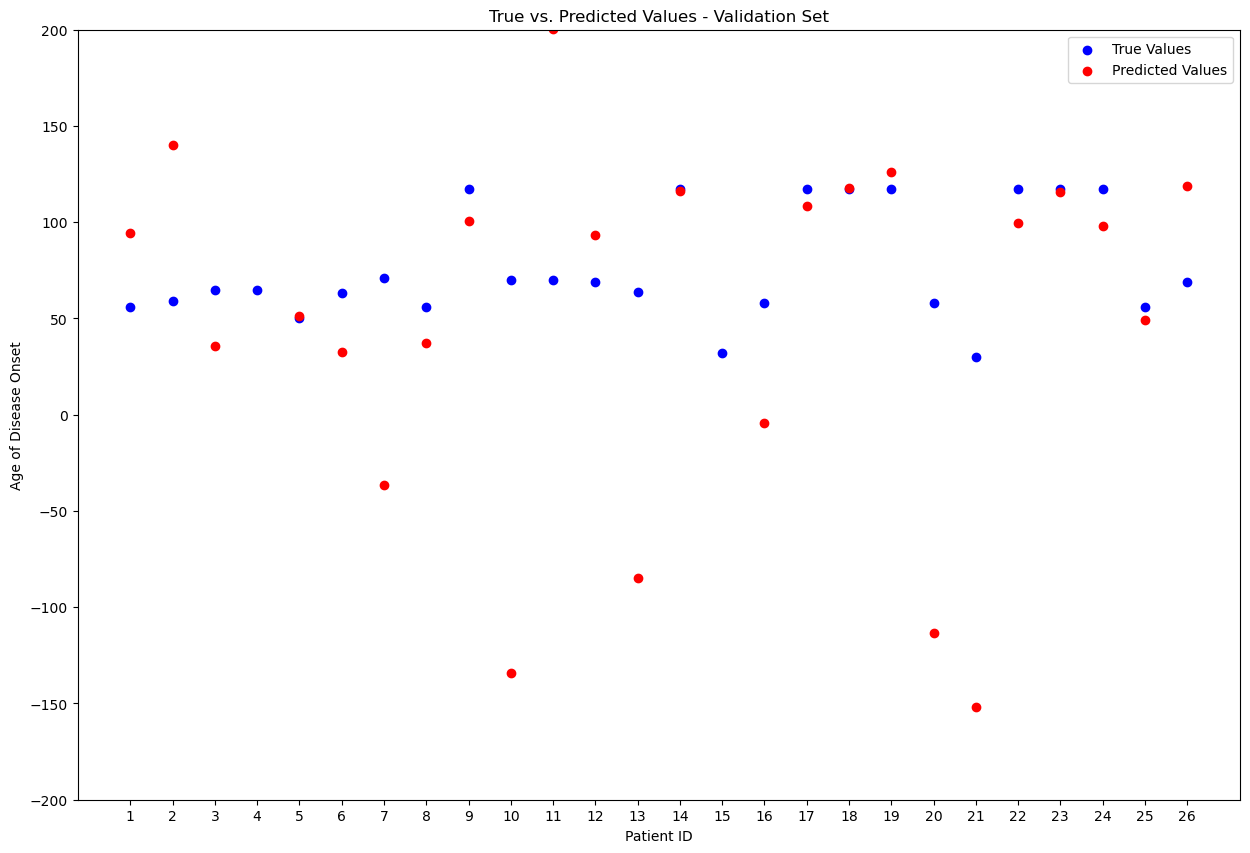

In [132]:
plt.figure(figsize=(15, 10))
plt.scatter(sorted_patient_labels, sorted_y_val, label='True Values', color='blue')
plt.scatter(sorted_patient_labels, rearranged_y_val_pred, label='Predicted Values', color='red')
plt.xticks(sorted_patient_labels)
plt.xlabel('Patient ID')
plt.ylabel('Age of Disease Onset')
plt.title('True vs. Predicted Values - Validation Set')
plt.ylim(-200,200,100)
plt.legend()
plt.show()
#Plot is showing in order of patient_label, not the sorted y_val in ascending order

/var/folders/__/ny4slbhj6zs7kh2ggv4p65b00000gn/T/ipykernel_53742/1317076287.py:11: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(-200, 200, 100)


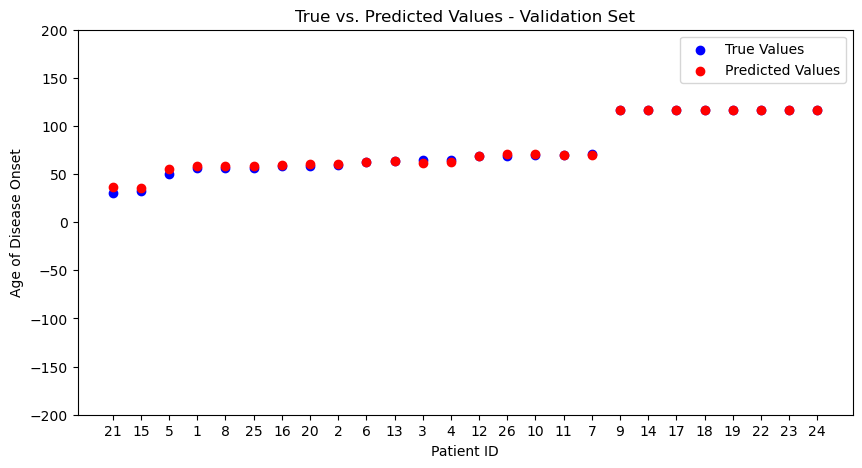

In [212]:
sorted_patient_labels = list(sorted_patient_labels)
sorted_patient_labels_pred = list(sorted_patient_labels_pred)

plt.figure(figsize=(10, 5))
plt.scatter(range(len(sorted_patient_labels)), sorted_y_val, label='True Values', color='blue')
plt.scatter(range(len(sorted_patient_labels)), rearranged_y_val_pred, label='Predicted Values', color='red')
plt.xticks(range(len(sorted_patient_labels)), sorted_patient_labels)
plt.xlabel('Patient ID')
plt.ylabel('Age of Disease Onset')
plt.title('True vs. Predicted Values - Validation Set')
plt.ylim(-200, 200, 100)
plt.legend()
plt.show()
#As you can see, very incorrect

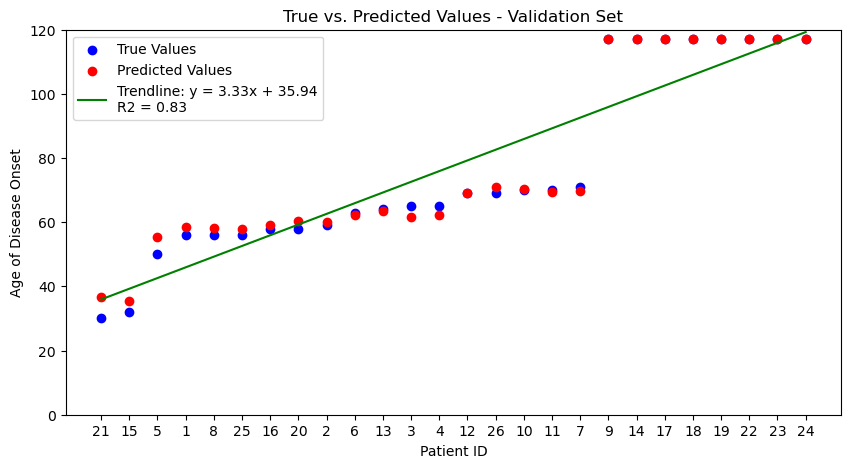

In [213]:
import numpy as np
from scipy.stats import linregress

# Convert to numpy arrays for linear regression
x_values = np.array(range(len(sorted_patient_labels)))
y_true = np.array(sorted_y_val)
y_pred = np.array(rearranged_y_val_pred)

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_pred)

# Calculate the trendline values
trendline = intercept + slope * x_values

# Calculate R-squared
r_squared = r_value**2

# Plotting
plt.figure(figsize=(10, 5))
plt.scatter(x_values, y_true, label='True Values', color='blue')
plt.scatter(x_values, y_pred, label='Predicted Values', color='red')
plt.plot(x_values, trendline, label=f'Trendline: y = {slope:.2f}x + {intercept:.2f}\nR2 = {r_squared:.2f}', color='green')

plt.xticks(x_values, sorted_patient_labels)
plt.xlabel('Patient ID')
plt.ylabel('Age of Disease Onset')
plt.title('True vs. Predicted Values - Validation Set')
plt.ylim(0, 120)
plt.legend()
plt.show()
#Added a trendline and it has R2 of 0

In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

# Fit the model to the entire training set
model.fit(X_prep, y_train)

# Validate the model on the validation set
y_val_pred = model.predict(X_val_prep)

# Calculate and print the Mean Squared Error (MSE) on the validation set
mse = mean_squared_error(y_val, y_val_pred)
print(f'Mean Squared Error on Validation Set: {mse}')

In [ ]:
Q1 = np.percentile(y_val_pred, 25)
Q3 = np.percentile(y_val_pred, 75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
filtered_y_val_pred = [0 if lower_bound <= x <= upper_bound else x for x in y_val_pred]

num_samples = len(filtered_y_val_pred)
patient_labels = ['{}'.format(i+1) for i in range(num_samples)]

In [247]:
sorted_data = sorted(zip(patient_labels, y_val), key=lambda x: x[1])
sorted_pred = sorted(zip(patient_labels, y_val_pred), key=lambda x: x[1])

# Unzip the sorted data
sorted_patient_labels, sorted_y_val = zip(*sorted_data)
sorted_patient_labels_pred, sorted_y_val_pred = zip(*sorted_pred)

# Rearrange patient_labels of y_val_pred to match the order of sorted_patient_labels
rearranged_y_val_pred = [y_val_pred[patient_labels.index(label)] for label in sorted_patient_labels]

# Print the results
print("Sorted patient_labels:", sorted_patient_labels)
print("Sorted y_val:", sorted_y_val)
print("Sorted patient_labels_pred:", sorted_patient_labels_pred)
print("Rearranged y_val_pred:", rearranged_y_val_pred)

Sorted patient_labels: ('9', '14', '17', '18', '19', '22', '23', '24', '21', '15', '5', '1', '8', '25', '16', '20', '2', '6', '13', '3', '4', '12', '26', '10', '11', '7')
Sorted y_val: ('117', '117', '117', '117', '117', '117', '117', '117', '30', '32', '50', '56', '56', '56', '58', '58', '59', '63', '64', '65', '65', '69', '69', '70', '70', '71')
Sorted patient_labels_pred: ('6', '8', '9', '14', '17', '18', '19', '22', '23', '24', '25', '26', '1', '16', '3', '5', '10', '11', '21', '13', '7', '12', '2', '4', '15', '20')
Rearranged y_val_pred: ['117', '117', '117', '117', '117', '117', '117', '117', '63', '73', '63', '61', '117', '117', '61', '73', '72', '117', '64', '63', '73', '68', '117', '63', '63', '68']


/var/folders/__/ny4slbhj6zs7kh2ggv4p65b00000gn/T/ipykernel_47385/4009594573.py:9: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(-10,20,1)


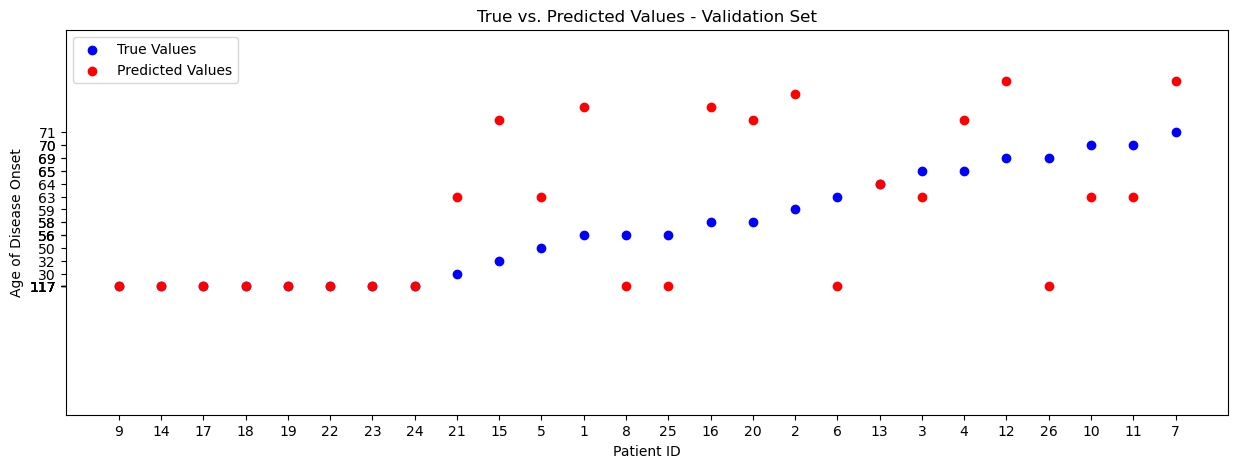

In [260]:
plt.figure(figsize=(15, 5))
plt.scatter(sorted_patient_labels, sorted_y_val, label='True Values', color='blue')
plt.scatter(sorted_patient_labels, rearranged_y_val_pred, label='Predicted Values', color='red')
plt.xticks(patient_labels)
plt.yticks(sorted_y_val)
plt.xlabel('Patient ID')
plt.ylabel('Age of Disease Onset')
plt.title('True vs. Predicted Values - Validation Set')
plt.ylim(-10,20,1)
plt.legend()
plt.show()

In [137]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Standardize the features (important for Ridge and Lasso)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_prep)
X_val_scaled = scaler.transform(X_val_prep)

# Create a Ridge Regression model with a specified alpha (regularization strength)
ridge_model = Ridge(alpha=1.0)

# Fit the Ridge model to the training set
ridge_model.fit(X_train_scaled, y_train)

# Validate the Ridge model on the validation set
y_val_pred_ridge = ridge_model.predict(X_val_scaled)

# Calculate and print the Mean Squared Error (MSE) on the validation set
mse_ridge = mean_squared_error(y_val, y_val_pred_ridge)
print(f'Mean Squared Error (Ridge) on Validation Set: {mse_ridge}')

Mean Squared Error (Ridge) on Validation Set: 898.2210622619386


In [138]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Standardize the features (important for Ridge and Lasso)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_prep)
X_val_scaled = scaler.transform(X_val_prep)

# Create a Lasso Regression model with a specified alpha (regularization strength)
lasso_model = Lasso(alpha=1.0)

# Fit the Lasso model to the training set
lasso_model.fit(X_train_scaled, y_train)

# Validate the Lasso model on the validation set
y_val_pred_lasso = lasso_model.predict(X_val_scaled)

# Calculate and print the Mean Squared Error (MSE) on the validation set
mse_lasso = mean_squared_error(y_val, y_val_pred_lasso)
print(f'Mean Squared Error (Lasso) on Validation Set: {mse_lasso}')

Mean Squared Error (Lasso) on Validation Set: 459.4719761041927


In [140]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Standardize the features (important for SVR)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_prep)
X_val_scaled = scaler.transform(X_val_prep)

# Create an SVR model
svr_model = SVR()

# Fit the SVR model to the training set
svr_model.fit(X_train_scaled, y_train)

# Validate the SVR model on the validation set
y_val_pred_svr = svr_model.predict(X_val_scaled)

# Calculate and print the Mean Squared Error (MSE) on the validation set
mse_svr = mean_squared_error(y_val, y_val_pred_svr)
print(f'Mean Squared Error (SVR) on Validation Set: {mse_svr}')

Mean Squared Error (SVR) on Validation Set: 659.6806825027132


In [141]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Create an XGBoost Regressor model
xgb_model = XGBRegressor()

# Fit the XGBoost model to the training set
xgb_model.fit(X_prep, y_train)

# Validate the XGBoost model on the validation set
y_val_pred_xgb = xgb_model.predict(X_val_prep)

# Calculate and print the Mean Squared Error (MSE) on the validation set
mse_xgb = mean_squared_error(y_val, y_val_pred_xgb)
print(f'Mean Squared Error (XGBoost) on Validation Set: {mse_xgb}')

Mean Squared Error (XGBoost) on Validation Set: 8.339953209067552


In [142]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Create a Random Forest Regressor model
rf_model = RandomForestRegressor()

# Fit the Random Forest model to the training set
rf_model.fit(X_prep, y_train)

# Validate the Random Forest model on the validation set
y_val_pred_rf = rf_model.predict(X_val_prep)

# Calculate and print the Mean Squared Error (MSE) on the validation set
mse_rf = mean_squared_error(y_val, y_val_pred_rf)
print(f'Mean Squared Error (Random Forest) on Validation Set: {mse_rf}')

Mean Squared Error (Random Forest) on Validation Set: 18.012230769230765


In [145]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

# Assuming X_train_prep is a DataFrame
feature_names = X_prep.columns

# Plot feature importance with actual feature names
plot_importance(xgb_model, feature_names=feature_names)
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [148]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Calculate the median of the target variable in the training set
baseline_prediction = np.median(y_train)

# Create an array of baseline predictions with the same length as y_val
baseline_predictions = np.full_like(y_val, baseline_prediction)

# Calculate Mean Squared Error (MSE) for the baseline predictions
baseline_mse = mean_squared_error(y_val, baseline_predictions)

print(f'Baseline Mean Squared Error (MSE): {baseline_mse}')

Baseline Mean Squared Error (MSE): 823.9615384615385


In [147]:
# Need to make sure patient_labels and y_val have the same data types
y_train = [int(val) for val in y_train]
y_test = [int(val) for val in y_test]

Best Hyperparameters: {'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 200}


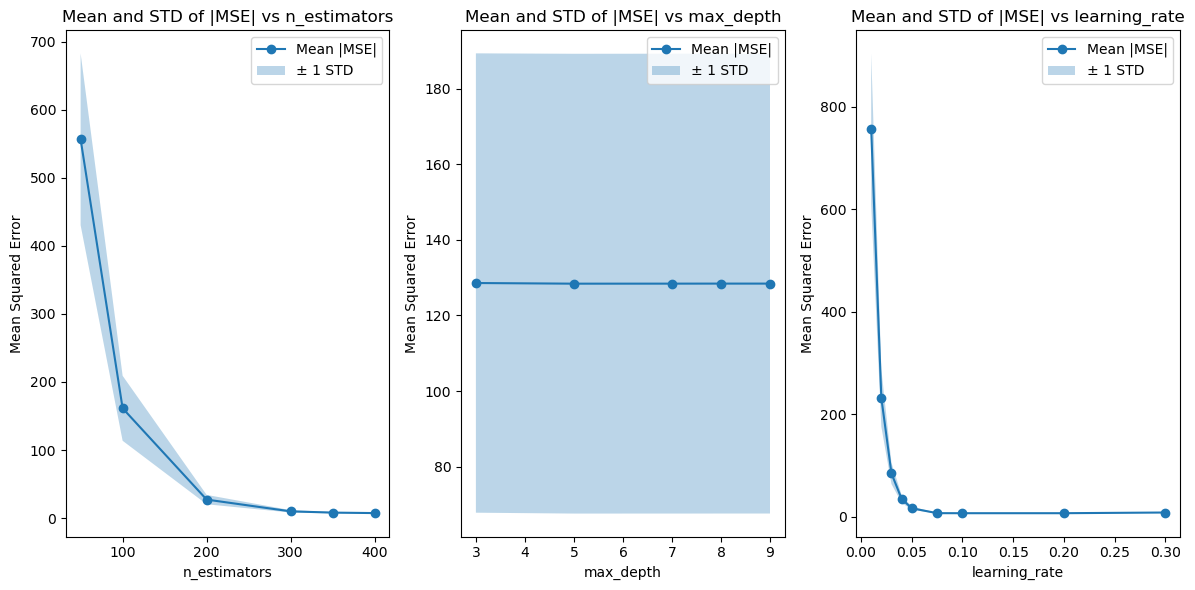

In [173]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.metrics import make_scorer, mean_squared_error
from xgboost import XGBRegressor

# Create an XGBoost Regressor
xgb_model = XGBRegressor()

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200, 300, 350, 400],
    'max_depth': [3, 5, 7, 8, 9],
    'learning_rate': [0.01, 0.02, 0.03, 0.04, 0.05, 0.075, 0.1, 0.2, 0.3],
}

# Define the scoring metric (negative mean squared error, as GridSearchCV maximizes the score)
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Create a GridSearchCV object
grid_search = GridSearchCV(
    xgb_model, 
    param_grid=param_grid, 
    scoring=mse_scorer, 
    cv=KFold(n_splits=5, shuffle=True, random_state=42),  # Use cross-validation with 5 folds
    n_jobs=-1  # Use all available CPU cores
)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_prep, y_train)

# Print the best hyperparameters
best_params = grid_search.best_params_
print(f'Best Hyperparameters: {best_params}')

# Get the results of the grid search
results = pd.DataFrame(grid_search.cv_results_)

# Plot the mean and standard deviation of the mean squared error for each hyperparameter combination
plt.figure(figsize=(12, 6))
for param in param_grid.keys():
    plt.subplot(1, len(param_grid), list(param_grid.keys()).index(param) + 1)
    
    param_results = results.groupby(f'param_{param}').agg({'mean_test_score': 'mean', 'std_test_score': 'std'})
    abs_mean_mse = abs(param_results['mean_test_score'])
    
    abs_mean_mse.plot(marker='o', label='Mean |MSE|')
    plt.fill_between(param_results.index, 
                     abs_mean_mse - param_results['std_test_score'],
                     abs_mean_mse + param_results['std_test_score'],
                     alpha=0.3, label='± 1 STD')
    plt.title(f'Mean and STD of |MSE| vs {param}')
    plt.xlabel(param)
    plt.ylabel('Mean Squared Error')
    plt.legend()

plt.tight_layout()
plt.show()

In [172]:
# Print the best hyperparameters
best_params = grid_search.best_params_
print(f'Best Hyperparameters: {best_params}')

# Extract the best estimator (XGBoost model with the best hyperparameters)
best_xgb_model = grid_search.best_estimator_

# Predict on the validation set using the best model
y_val_pred = best_xgb_model.predict(X_val_prep)

# Calculate and print the Mean Squared Error (MSE) on the validation set
best_mse = mean_squared_error(y_val, y_val_pred)
print(f'Mean Squared Error on Validation Set with Best Hyperparameters: {best_mse}')

Best Hyperparameters: {'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 200}
Mean Squared Error on Validation Set with Best Hyperparameters: 5.283426166649196


In [166]:
# Get the results of the grid search
results = pd.DataFrame(grid_search.cv_results_)

# Print MSE for each combination of parameters
for i, params in enumerate(results['params']):
    mse = abs(results['mean_test_score'][i])  # Remove the negative sign
    print(f'Parameters: {params}, MSE: {mse}')

Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}, MSE: 3100.0999134570416
Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}, MSE: 1191.2337807766953
Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}, MSE: 185.04005014817113
Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}, MSE: 34.38079094793438
Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 350}, MSE: 17.95336352791984
Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 400}, MSE: 11.747297417709197
Parameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}, MSE: 3100.0999134570416
Parameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 100}, MSE: 1191.2337807766953
Parameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200}, MSE: 184.55765051768748
Parameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 300}, MSE: 33.631075686496146
Parameters: {'learning_r

In [185]:
best_xgb_model = grid_search.best_estimator_

#preprocessor.fit(X_test)

y_test_pred = best_xgb_model.predict(X_val_prep)

mse = mean_squared_error(y_val, y_val_pred)
print(f'Mean Squared Error on Test Set: {mse}')

Mean Squared Error on Test Set: 5.283426166649196


In [183]:
sorted_data = sorted(zip(patient_labels, y_val), key=lambda x: x[1])
sorted_pred = sorted(zip(patient_labels, y_val_pred), key=lambda x: x[1])

# Unzip the sorted data
sorted_patient_labels, sorted_y_val = zip(*sorted_data)
sorted_patient_labels_pred, sorted_y_val_pred = zip(*sorted_pred)

# Rearrange patient_labels of y_val_pred to match the order of sorted_patient_labels
rearranged_y_val_pred = [y_val_pred[patient_labels.index(label)] for label in sorted_patient_labels]

# Print the results
print("Sorted patient_labels:", sorted_patient_labels)
print("Sorted y_val:", sorted_y_val)
print("Sorted patient_labels_pred:", sorted_patient_labels_pred)
print("Rearranged y_val_pred:", rearranged_y_val_pred)

Sorted patient_labels: (21, 15, 5, 1, 8, 25, 16, 20, 2, 6, 13, 3, 4, 12, 26, 10, 11, 7, 9, 14, 17, 18, 19, 22, 23, 24)
Sorted y_val: (30, 32, 50, 56, 56, 56, 58, 58, 59, 63, 64, 65, 65, 69, 69, 70, 70, 71, 117, 117, 117, 117, 117, 117, 117, 117)
Sorted patient_labels_pred: (15, 21, 5, 25, 8, 1, 16, 2, 20, 3, 4, 6, 13, 12, 11, 7, 10, 26, 17, 24, 18, 19, 14, 9, 23, 22)
Rearranged y_val_pred: [36.821083, 35.532516, 55.3415, 58.607044, 58.203888, 57.907234, 59.095165, 60.527103, 60.164955, 62.32368, 63.478153, 61.62375, 62.196564, 69.04425, 70.953804, 70.47496, 69.515396, 69.849556, 116.99543, 116.99071, 116.96969, 116.98214, 116.98802, 117.06535, 116.99981, 116.97905]


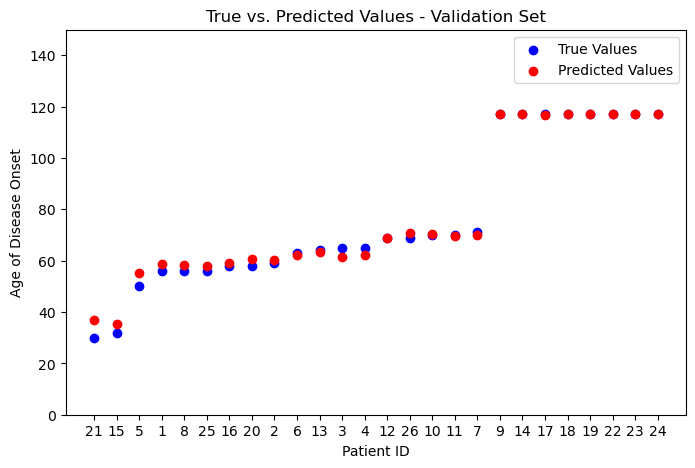

In [195]:
sorted_patient_labels = list(sorted_patient_labels)
sorted_patient_labels_pred = list(sorted_patient_labels_pred)

plt.figure(figsize=(8, 5))
plt.scatter(range(len(sorted_patient_labels)), sorted_y_val, label='True Values', color='blue')
plt.scatter(range(len(sorted_patient_labels)), rearranged_y_val_pred, label='Predicted Values', color='red')
plt.xticks(range(len(sorted_patient_labels)), sorted_patient_labels)
plt.xlabel('Patient ID')
plt.ylabel('Age of Disease Onset')
plt.title('True vs. Predicted Values - Validation Set')
plt.ylim(0, 150)
plt.legend()
plt.show()

<Figure size 1000x600 with 0 Axes>

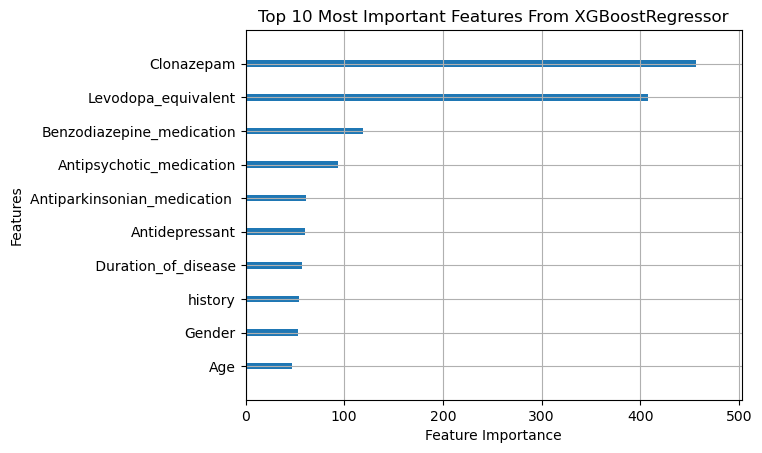

In [194]:
best_xgb_model = grid_search.best_estimator_

feature_names = X_train.columns.tolist()

plt.figure(figsize=(10, 6))
plot_importance(best_xgb_model, importance_type='weight', max_num_features=10, show_values=False, xlabel='Feature Importance', ylabel='Features', title='Top 10 Feature Importance')
plt.yticks(range(10), feature_names[:10])
plt.title('Top 10 Most Important Features From XGBoostRegressor')
plt.show()

In [193]:
df = pd.DataFrame(X_prep)
df.to_csv('preprocessed_X_train_data.csv', index=False)

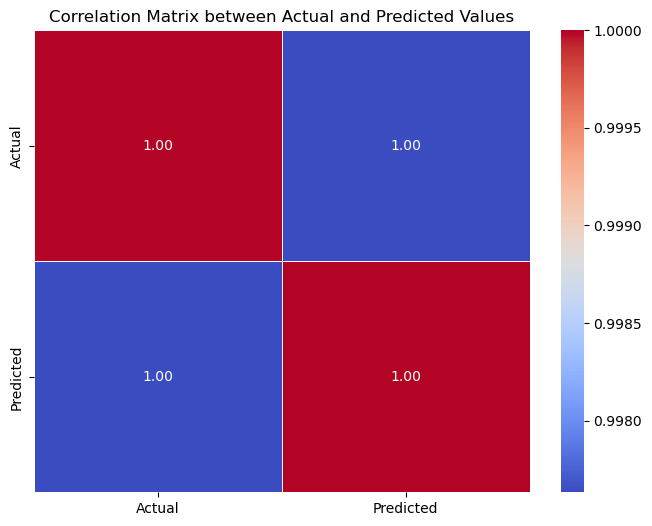

In [220]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Create a DataFrame with actual and predicted values
result_df = pd.DataFrame({'Actual': y_val, 'Predicted': y_val_pred})

# Calculate the correlation matrix
correlation_matrix = result_df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix between Actual and Predicted Values')
plt.show()

In [197]:
combined_values = np.column_stack((y_val, y_val_pred))

# Calculate the correlation coefficient matrix
correlation_matrix = np.corrcoef(combined_values, rowvar=False)

print("Correlation Coefficient Matrix:")
print(correlation_matrix)

Correlation Coefficient Matrix:
[[1.        0.9976332]
 [0.9976332 1.       ]]


In [207]:
#df = pd.read_csv('data/parkinsonsdata.csv')
#df['Age_of_disease_onset'] = df['Age_of_disease_onset'].astype(int)
#feature_values = df['Age_of_disease_onset']
min_value = np.min(y)
max_value = np.max(y)

print(min_value)
print(max_value)

30
117


In [210]:
pd.set_option('display.max_rows', None)
print(y)

0       56
1       67
2       67
3       73
4       60
5       58
6       78
7       57
8       72
9       65
10      70
11      32
12      37
13      69
14      73
15      63
16      71
17      72
18      30
19      69
20      69
21      63
22      71
23      60
24      76
25      67
26      72
27      59
28      58
29      68
30      72
31      46
32      55
33      56
34      59
35      66
36      62
37      73
38      63
39      64
40      70
41      61
42      63
43      81
44      64
45      56
46      61
47      56
48      54
49      71
50      68
51      54
52      36
53      68
54      64
55      65
56      46
57      40
58      55
59      50
60      62
61      50
62      67
63      63
64      57
65      57
66      58
67      54
68      61
69      57
70      53
71      63
72      62
73      60
74      41
75      74
76      68
77      69
78      50
79      33
80     117
81     117
82     117
83     117
84     117
85     117
86     117
87     117
88     117
89     117
90     117

In [204]:
y = y.astype(int)

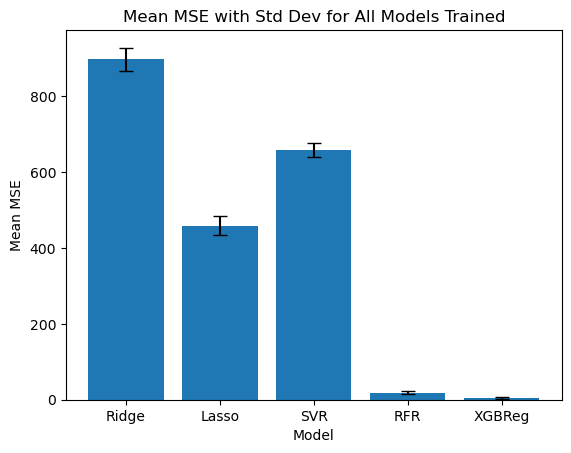

In [219]:
data = {
    'Model': ['Ridge', 'Lasso', 'SVR', 'RFR', 'XGBReg'],
    'Mean MSE': [898.22, 459.47, 659.68, 18.01, 5.28],
    'Std': [30.34, 24.76, 18.32, 4.19, 3.15]
}

df = pd.DataFrame(data)

# Plot the bar graph with error bars
plt.bar(df['Model'], df['Mean MSE'], yerr=df['Std'], capsize=5)

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Mean MSE')
plt.title('Mean MSE with Std Dev for All Models Trained')

# Show the plot
plt.show()